# Лабораторная работа 7. Сжатие изображений

## Задача 1

Для условной картинки, представленной в на рисунке, реализовать кодирование Хаффмана. Посчитать коэффициент сжатия, энтропию и относительную избыточность информации.

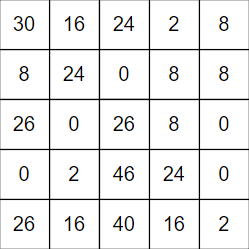

In [1]:
import numpy as np

In [1]:
import numpy as np
from collections import Counter, namedtuple
import heapq
import math

class HuffmanNode(namedtuple("HuffmanNode", ["left", "right"])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")

class HuffmanLeaf(namedtuple("HuffmanLeaf", ["char"])):
    def walk(self, code, acc):
        code[self.char] = acc or "0"

def huffman_code(freqs):
    h = []
    for char, freq in freqs.items():
        h.append((freq, len(h), HuffmanLeaf(char)))
    heapq.heapify(h)
    count = len(h)
    while len(h) > 1:
        freq1, _count1, left = heapq.heappop(h)
        freq2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (freq1 + freq2, count, HuffmanNode(left, right)))
        count += 1
    code = {}
    if h:
        [(_freq, _count, root)] = h
        root.walk(code, "")
    return code

# Входная матрица
img = np.array([
    [30, 16, 24, 2, 8],
    [8, 24, 0, 8, 8],
    [26, 0, 26, 8, 0],
    [0, 2, 46, 24, 0],
    [26, 16, 40, 16, 2]
])

# Подсчет частот
values = img.flatten()
freqs = dict(Counter(values))

# Кодирование Хаффмана
code = huffman_code(freqs)

# Преобразование исходного изображения
encoded_img = "".join(code[val] for val in values)

# Вычисление некоторых характеристик

# Коэффициент сжатия
original_size = len(values) * 8  # оригинальный размер в битах (8 бит на пиксель)
encoded_size = sum(freqs[val] * len(code[val]) for val in freqs)  # размер сжатого изображения в битах
compression_ratio = original_size / encoded_size

# Энтропия
total_values = sum(freqs.values())
entropy = -sum((freq / total_values) * math.log2(freq / total_values) for freq in freqs.values())

# Средняя длина кодов Хаффмана
avg_code_length = sum((freq / total_values) * len(code[val]) for val, freq in freqs.items())

# Относительная избыточность информации
redundancy = 1 - (entropy / avg_code_length)

# Вывод результатов
print(f"Кодировка Хаффмана: {code}")
print(f"Закодированное изображение: {encoded_img}")
print(f"Коэффициент сжатия: {compression_ratio:.2f}")
print(f"Энтропия: {entropy:.2f}")
print(f"Относительная избыточность информации: {redundancy:.2f}")

Кодировка Хаффмана: {0: '00', 16: '010', 24: '011', 2: '100', 26: '101', 40: '1100', 30: '11010', 46: '11011', 8: '111'}
Закодированное изображение: 110100100111001111110110011111110100101111000010011011011001010101100010100
Коэффициент сжатия: 2.67
Энтропия: 2.95
Относительная избыточность информации: 0.02


In [28]:
img = np.array([
    [30, 16, 24, 2, 8],
    [8, 24, 0, 8, 8],
    [26, 0, 26, 8, 0],
    [0, 2, 46, 24, 0],
    [26, 16, 40, 16, 2]
])
vals, counts = np.unique(img, return_counts=True)
probs = counts / counts.sum()
vals, probs

(array([ 0,  2,  8, 16, 24, 26, 30, 40, 46]),
 array([0.2 , 0.12, 0.2 , 0.12, 0.12, 0.12, 0.04, 0.04, 0.04]))

In [ ]:
reductions = []
items = zip(vals, probs)
items = sorted(items, key=lambda x: x[1], reverse=True)
num_reduction = len(items)
while num_reduction > 2:
    buf = items[:-2]
    new_item = []
    for _ in items:
        new_item = map()
        buf.append(sum(items[-2:]))
    probs_old = sorted(buf, reverse=True)
    print(probs_old)
    break
items

[(0, 0.2),
 (8, 0.2),
 (2, 0.12),
 (16, 0.12),
 (24, 0.12),
 (26, 0.12),
 (30, 0.04),
 (40, 0.04),
 (46, 0.04)]

In [ ]:
probs_old[:-2].append(sum(probs_old[-2:]))


## Задача 2

Еще будет